In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
eval_sub = pd.read_csv('eval_ds.csv', sep = ';').iloc[:4,:14]
dev_sub = pd.read_csv('dev_ds.csv', sep = ';').iloc[:4, :14]

In [3]:
eval_sub

,Submission,rank,fan_AUC,fan_pAUC,pump_AUC,pump_pAUC,slider_AUC,slider_pAUC,valve_AUC,valve_pAUC,ToyCar_AUC,ToyCar_pAUC,ToyConveyor_AUC,ToyConveyor_pAUC
0,Giri_Amazon_task2_2,1.0,94.54 %,84.30 %,93.65 %,81.73 %,97.63 %,89.73 %,96.13 %,90.89 %,94.34 %,89.73 %,91.19 %,73.34 %
1,Daniluk_SRPOL_task2_4,2.0,99.13 %,96.40 %,95.07 %,90.23 %,98.18 %,91.98 %,90.97 %,77.41 %,93.52 %,83.87 %,90.51 %,77.56 %
2,Primus_CP-JKU_task2_2,3.0,96.84 %,95.24 %,97.76 %,92.24 %,97.29 %,88.74 %,90.15 %,86.65 %,86.37 %,83.83 %,88.28 %,79.15 %
3,Vinayavekhin_IBM_task2_2,4.0,98.84 %,94.89 %,94.37 %,88.27 %,95.68 %,83.09 %,97.82 %,94.93 %,93.16 %,87.69 %,87.41 %,72.03 %


In [4]:
for i in range(4):
  for j in range(2,14):
    val= eval_sub.iloc[i,j]
    val = float(val.replace(' %',''))
    eval_sub.iloc[i,j] = val
    
    val1 = dev_sub.iloc[i,j]
    val1 = float(val1.replace(' %',''))
    dev_sub.iloc[i,j] = val1

# AUC means

In [5]:
auc_eval = eval_sub.iloc[:, 2:14:2]
auc_dev = dev_sub.iloc[:, 2:14:2]

In [6]:
auc_avg_eval = []
auc_avg_dev = []
for i in range(4):
  mean_eval = np.mean(np.array(auc_eval.loc[i]))
  auc_avg_eval.append(mean_eval)

  mean_dev = np.mean(np.array(auc_dev.loc[i]))
  auc_avg_dev.append(mean_dev)

# pAUC means

In [7]:
pauc_eval = eval_sub.iloc[:, 3:14:2]
pauc_dev = dev_sub.iloc[:, 3:14:2]

In [8]:
pauc_avg_eval = []
pauc_avg_dev = []
for i in range(4):
  mean_eval = np.mean(np.array(pauc_eval.loc[i]))
  print(mean_eval)
  pauc_avg_eval.append(mean_eval)

  mean_dev = np.mean(np.array(pauc_dev.loc[i]))
  pauc_avg_dev.append(mean_dev)

84.95333333333333
86.24166666666667
87.64166666666667
86.81666666666666


In [9]:
names = eval_sub.iloc[:,0].values

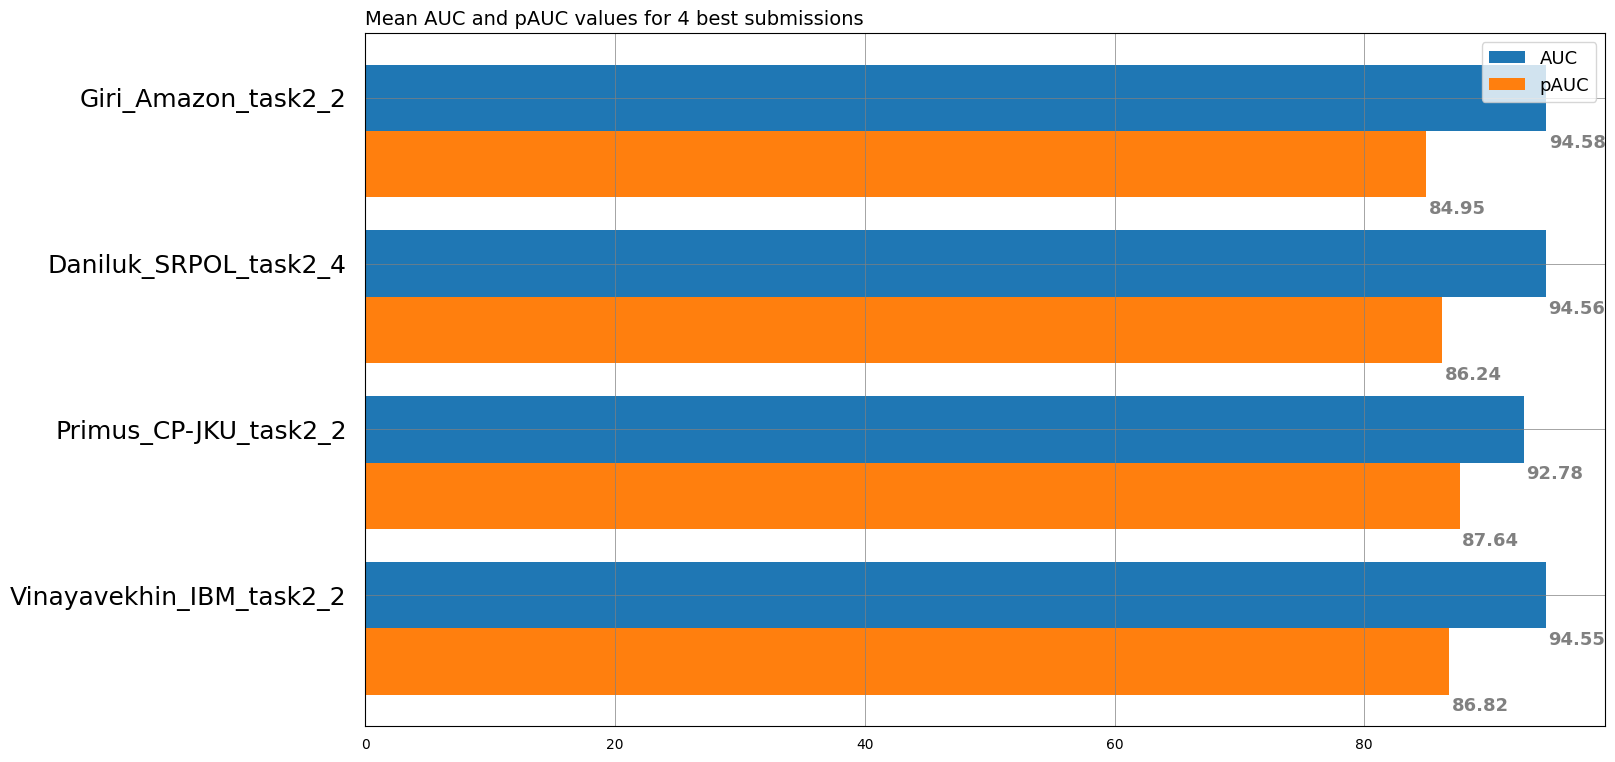

In [10]:
ds = pd.DataFrame({'1':names, '2':auc_avg_eval, '3':pauc_avg_eval})
names = ds['1']
auc_avg = ds['2']
pauc_avg = ds['3']

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
width1 = 0.4
plt.barh([i for i in range(4)], auc_avg, height = 0.4)
ax.barh([i+width1 for i in range(4)], pauc_avg, height = 0.4)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.yaxis.set_ticks(ticks = [i for i in range(4)], labels = names, fontsize = 18)
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(color ='grey', linewidth = 0.5, alpha = 1)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 13, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Mean AUC and pAUC values for 4 best submissions',
             loc ='left', fontsize = 14)
 
# Show Plot
ax.legend(['AUC', 'pAUC'], loc = 'upper right', fontsize = 13)
# ax.legend(['AUC', 'pAUC'])
plt.show()
fig.savefig('mean_auc_pauc_eval.jpg')

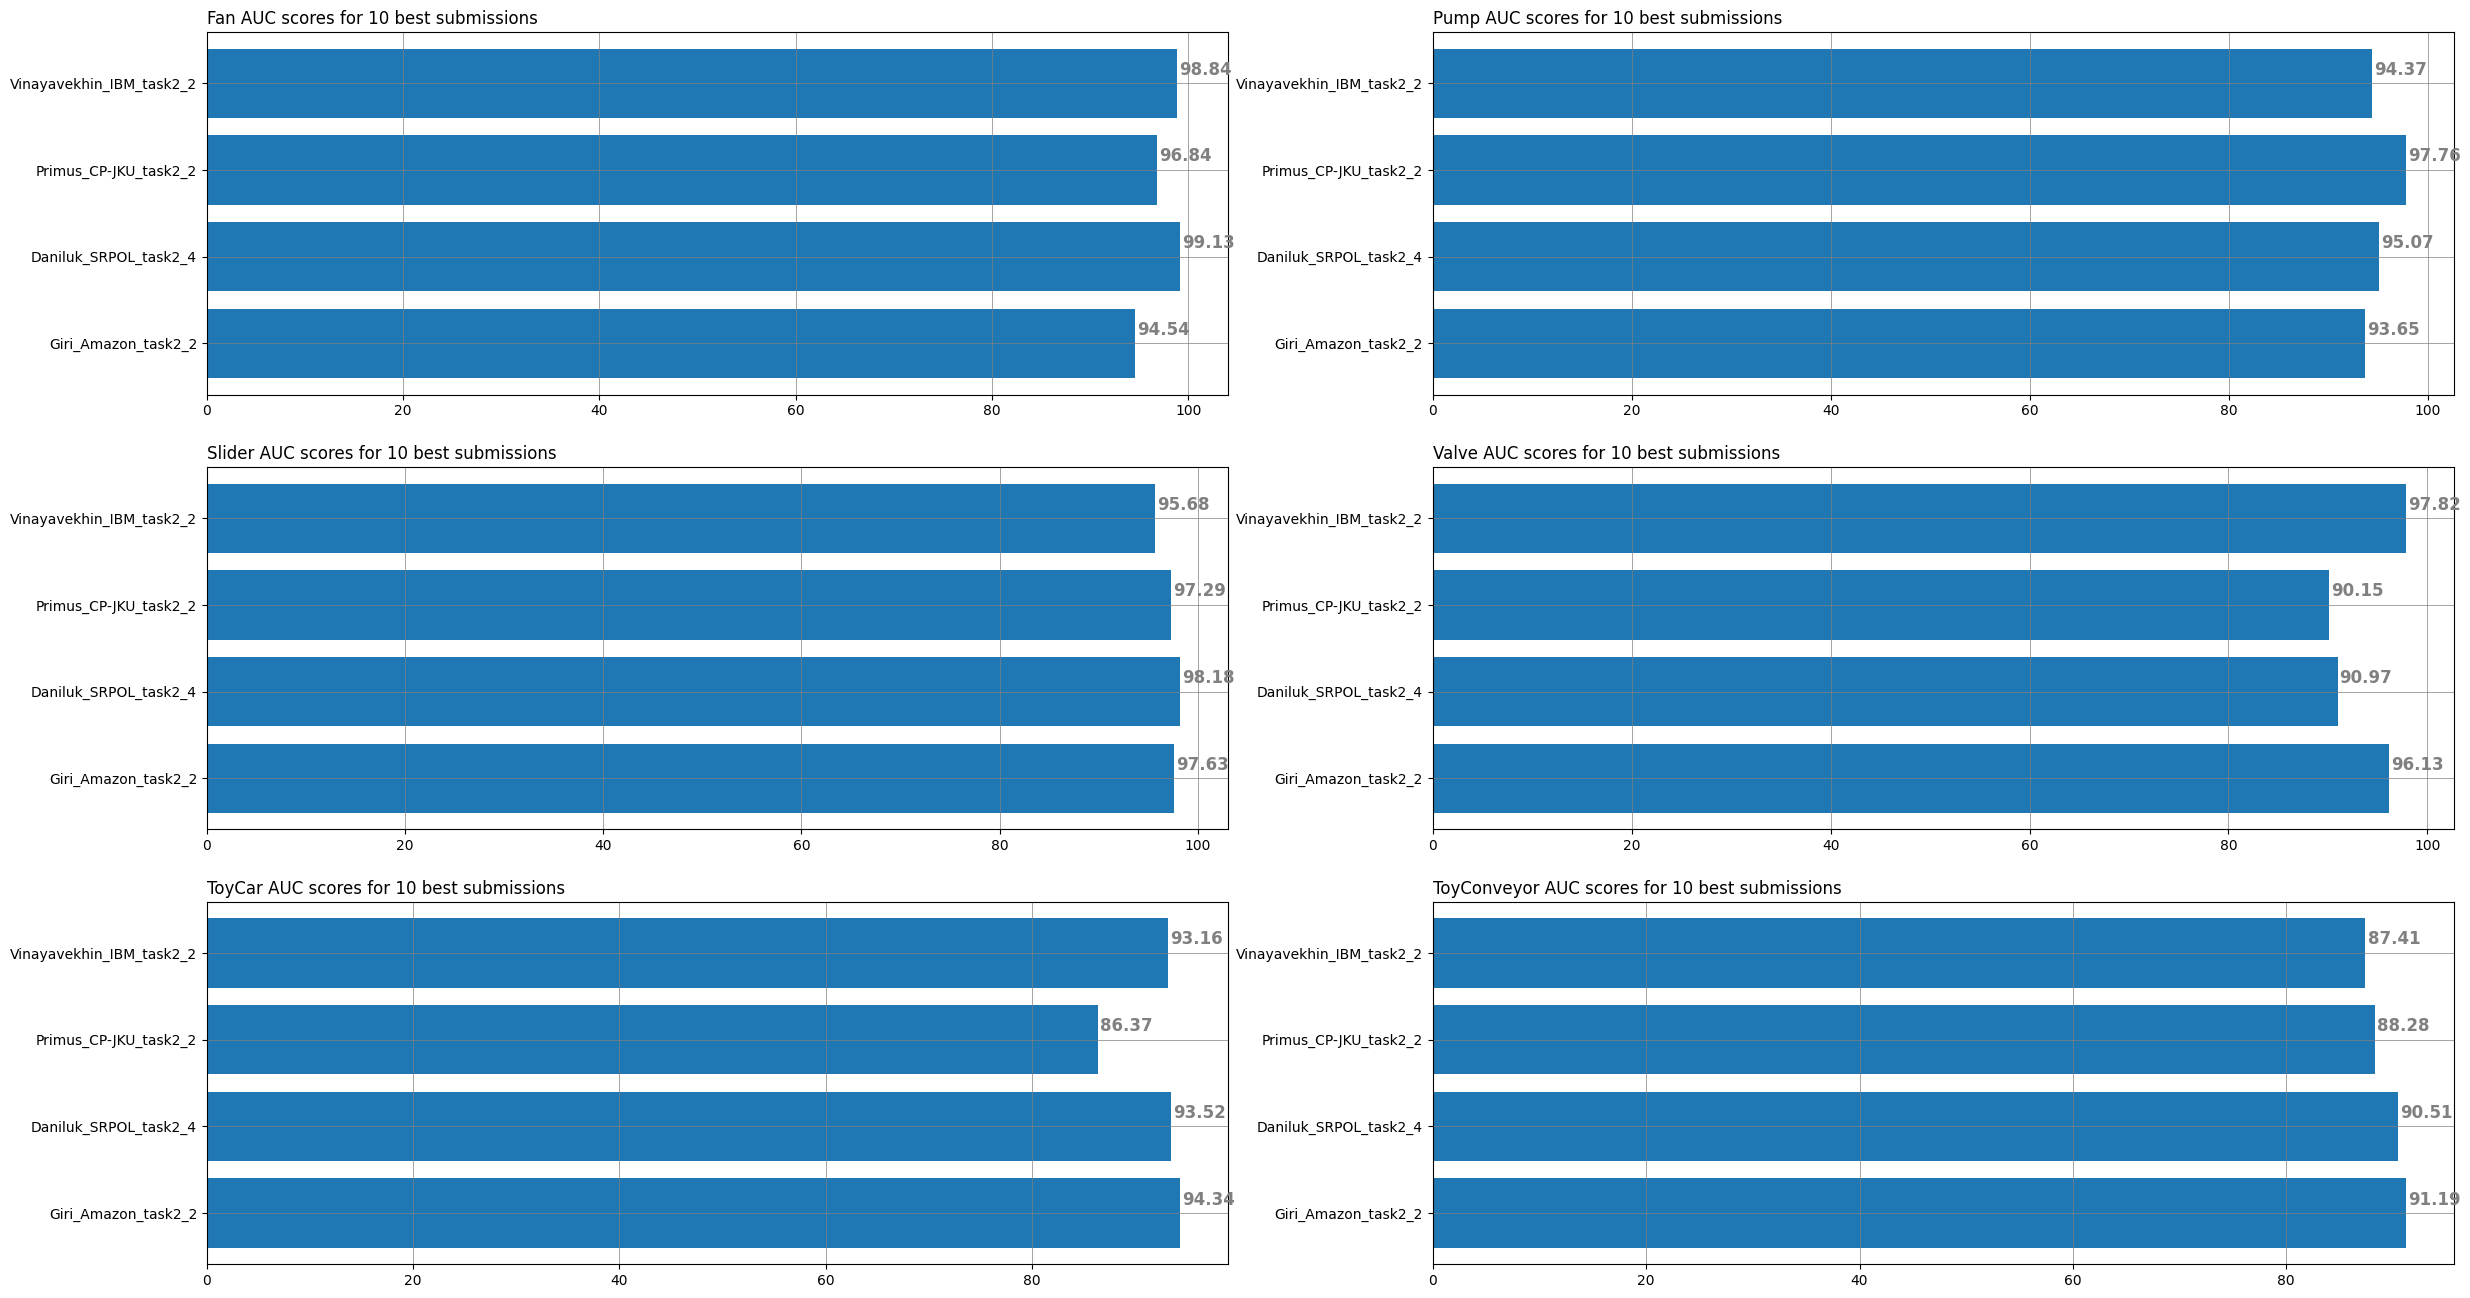

In [12]:
fig, ax = plt.subplots(3,2, figsize = (29,16))

ax[0][0].barh(names,eval_sub['fan_AUC'].values)
for i in ax[0][0].patches:
    ax[0][0].text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 12, fontweight ='bold',
             color ='grey')
ax[0][0].grid(color ='grey', linewidth = 0.5, alpha = 1)
ax[0][0].set_title('Fan AUC scores for 10 best submissions',
             loc ='left', fontsize = 12)

ax[0][1].barh(names,eval_sub['pump_AUC'].values)
for i in ax[0][1].patches:
    ax[0][1].text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 12, fontweight ='bold',
             color ='grey')
ax[0][1].grid(color ='grey', linewidth = 0.5, alpha = 1)
ax[0][1].set_title('Pump AUC scores for 10 best submissions',
             loc ='left', fontsize = 12)
ax[1][1].barh(names,eval_sub['valve_AUC'].values)
for i in ax[1][1].patches:
    ax[1][1].text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 12, fontweight ='bold',
             color ='grey')
ax[1][1].grid(color ='grey', linewidth = 0.5, alpha = 1)
ax[1][1].set_title('Valve AUC scores for 10 best submissions',
             loc ='left', fontsize = 12)
ax[1][0].barh(names,eval_sub['slider_AUC'].values)
for i in ax[1][0].patches:
    ax[1][0].text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 12, fontweight ='bold',
             color ='grey')
ax[1][0].grid(color ='grey', linewidth = 0.5, alpha = 1)
ax[1][0].set_title('Slider AUC scores for 10 best submissions',
             loc ='left', fontsize = 12)
ax[2][0].barh(names,eval_sub['ToyCar_AUC'].values)
for i in ax[2][0].patches:
    ax[2][0].text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 12, fontweight ='bold',
             color ='grey')
ax[2][0].grid(color ='grey', linewidth = 0.5, alpha = 1)
ax[2][0].set_title('ToyCar AUC scores for 10 best submissions',
             loc ='left', fontsize = 12)
ax[2][1].barh(names,eval_sub['ToyConveyor_AUC'].values)
for i in ax[2][1].patches:
    ax[2][1].text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 12, fontweight ='bold',
             color ='grey')
ax[2][1].grid(color ='grey', linewidth = 0.5, alpha = 1)
ax[2][1].set_title('ToyConveyor AUC scores for 10 best submissions',
             loc ='left', fontsize = 12)

plt.show()
fig.savefig('auc_for_mechanisms.png')